In [32]:
import time

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle as pkl
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["mathtext.fontset"] = "cm"
plt.rcParams['axes.labelsize']=14
plt.rcParams['xtick.labelsize']=11
plt.rcParams['ytick.labelsize']=11
plt.rcParams['axes.grid']=True
plt.rcParams['axes.xmargin']=0

In [33]:
with open('data/ekf_prbs_data.pkl', 'rb') as f:
    ekf_data = pkl.load(f)
    
with open('data/ekf_prbs_unknown_param_data.pkl', 'rb') as f:
    ekf_monco_data = pkl.load(f)
    
with open('data/transformer_prbs_data.pkl', 'rb') as f:
    transformer_data = pkl.load(f)

with open('data/transformer_prbs_data2.pkl', 'rb') as f:
    transformer_data_2 = pkl.load(f)

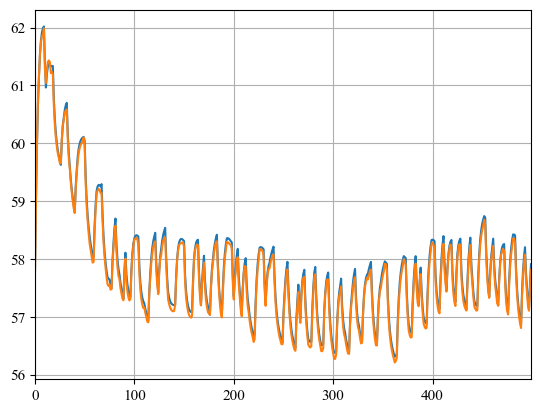

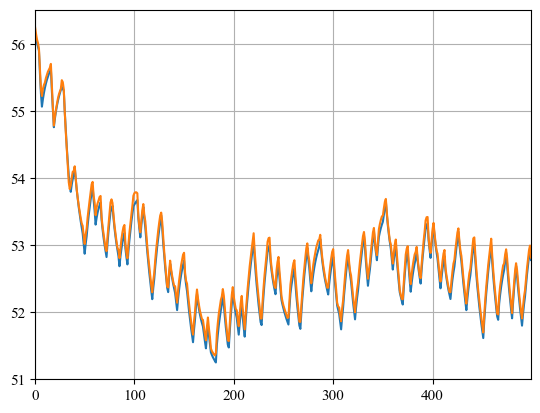

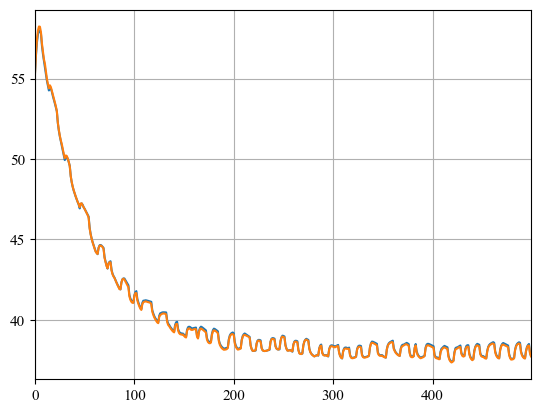

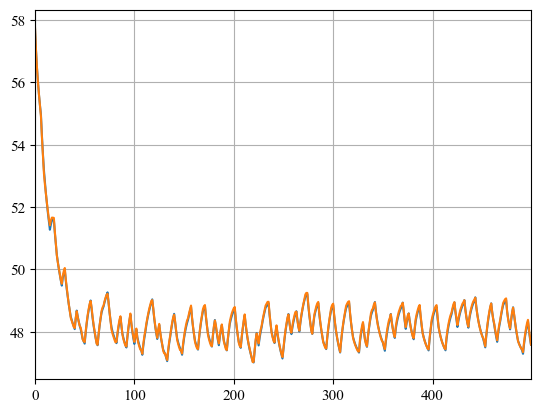

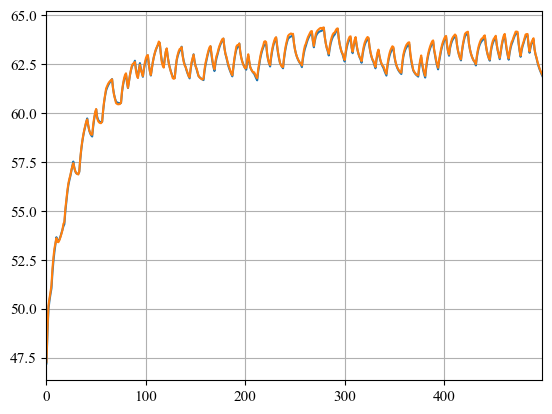

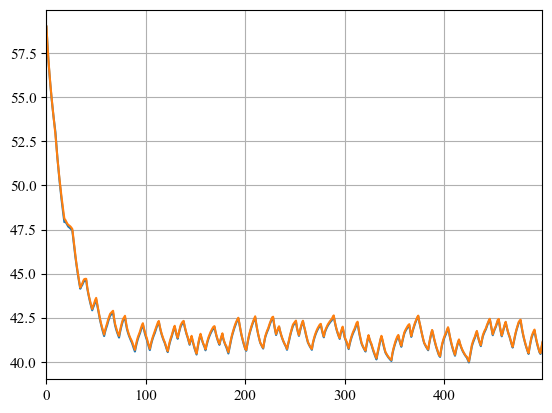

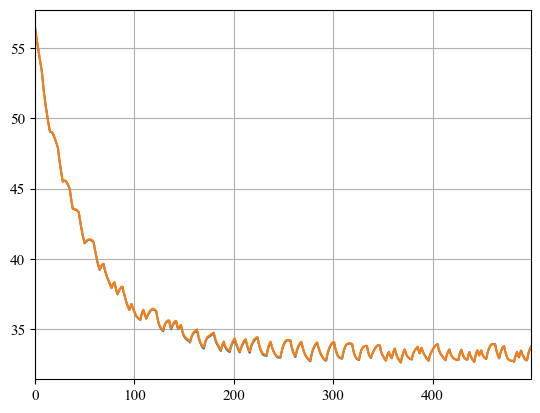

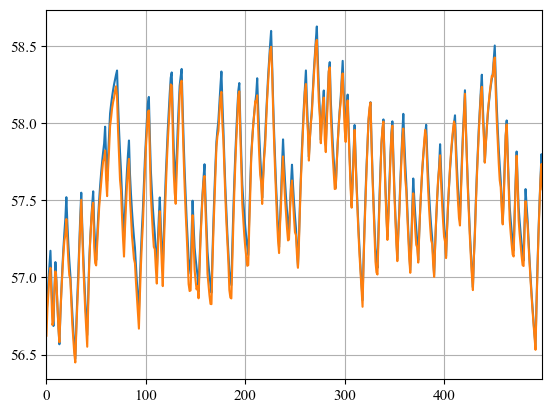

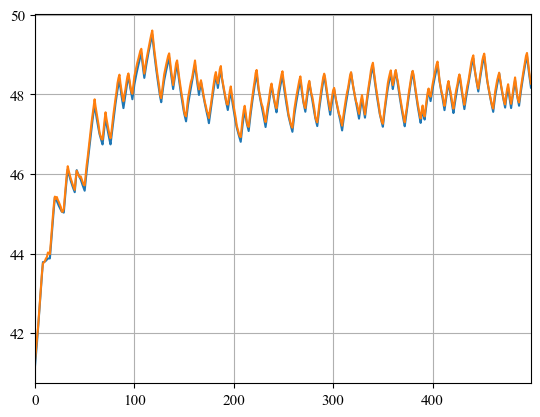

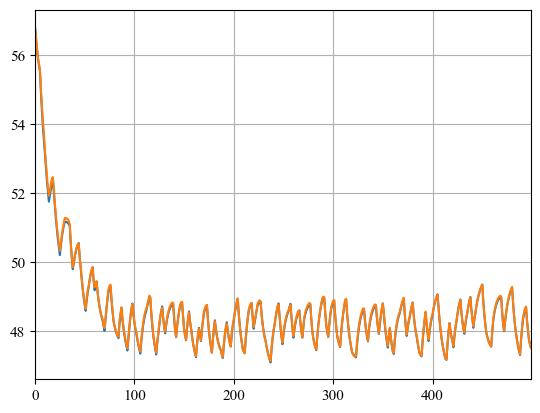

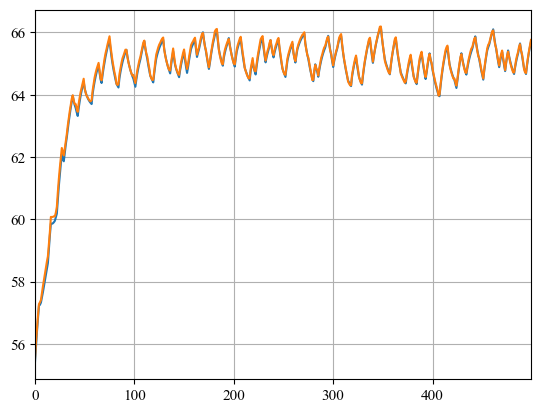

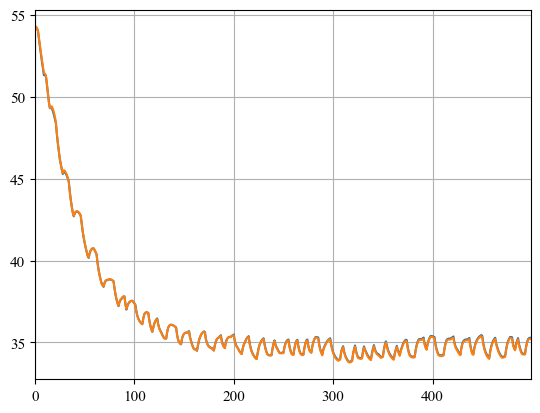

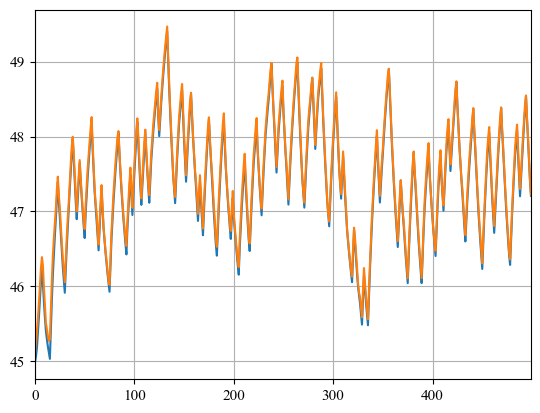

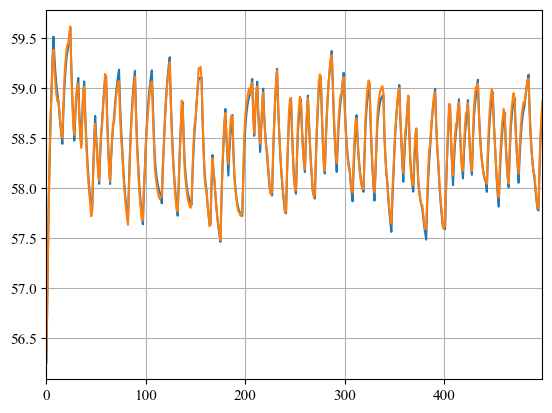

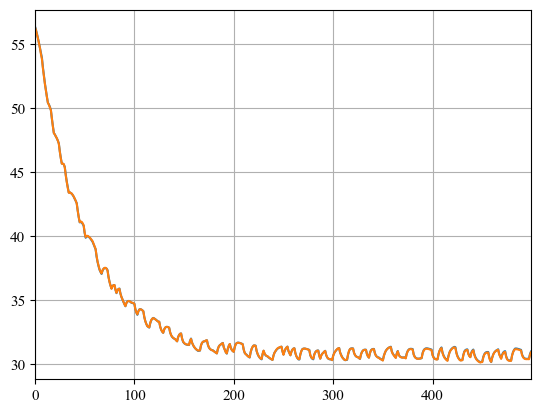

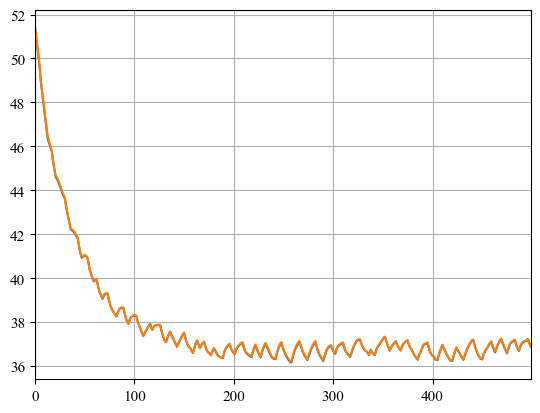

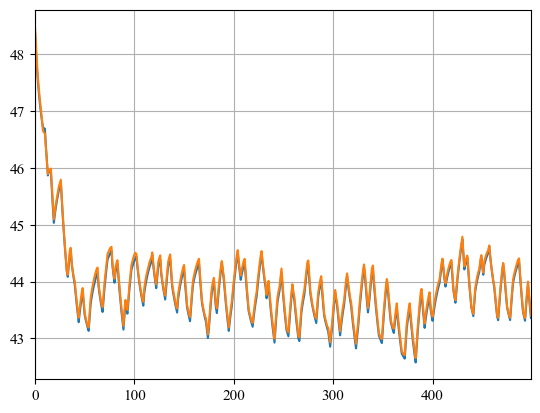

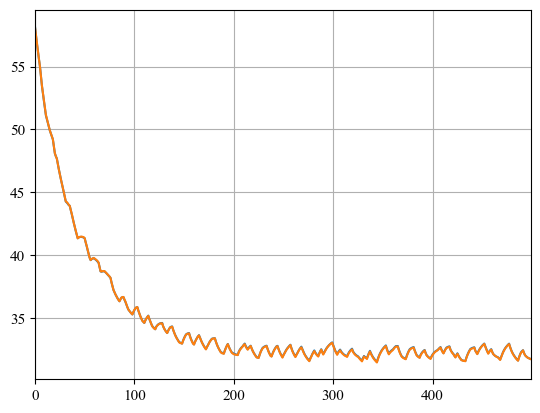

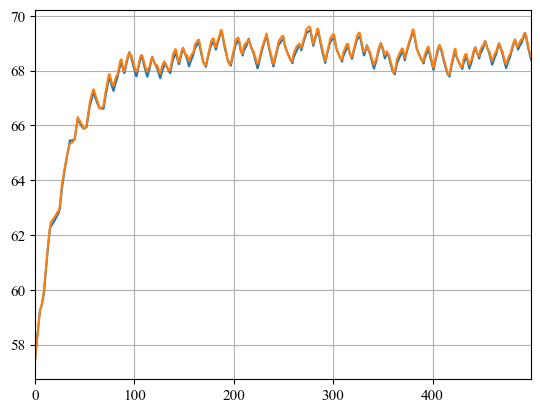

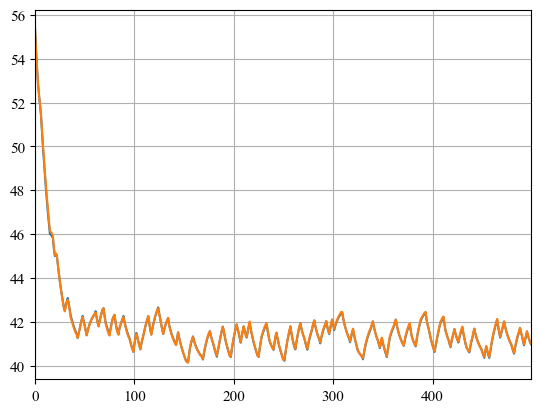

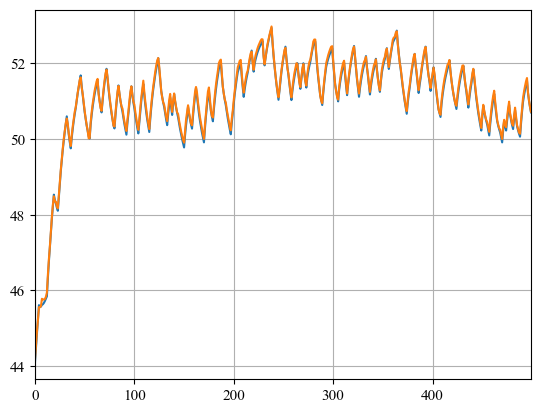

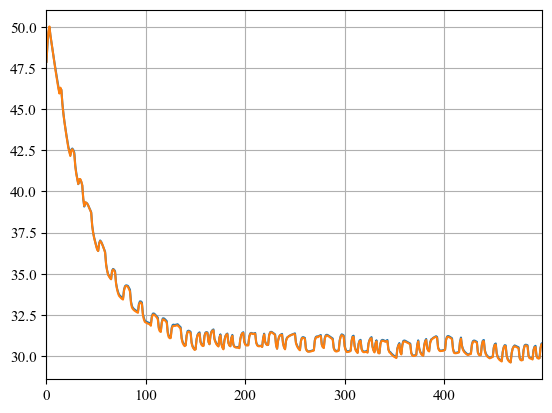

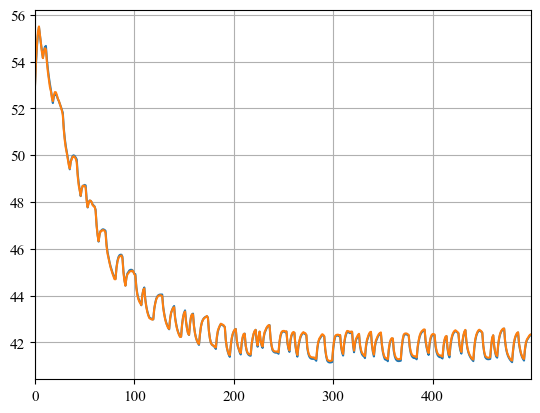

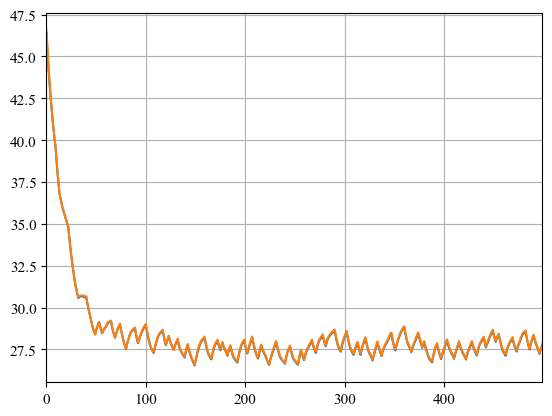

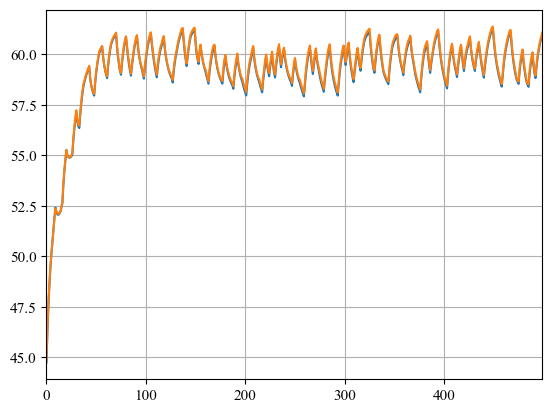

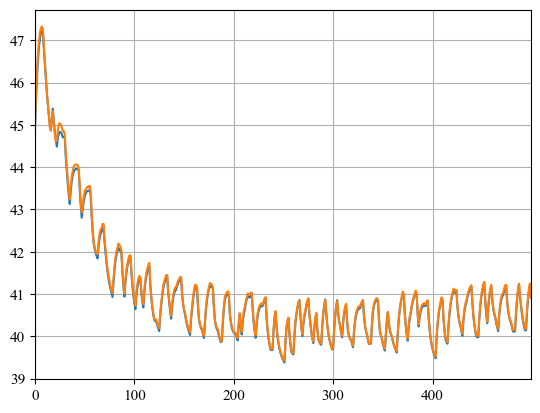

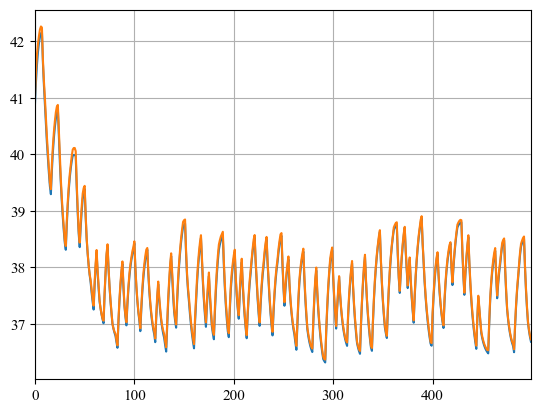

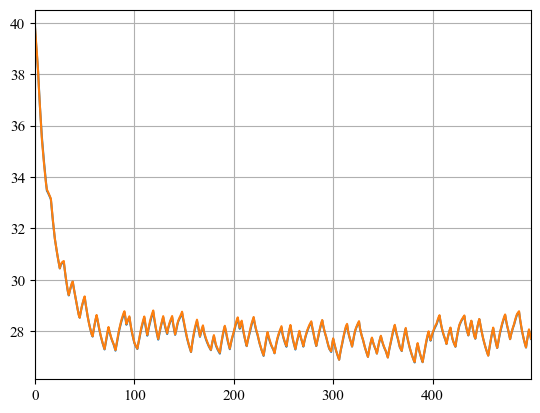

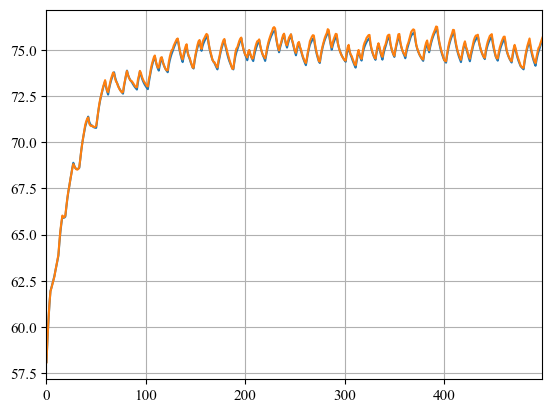

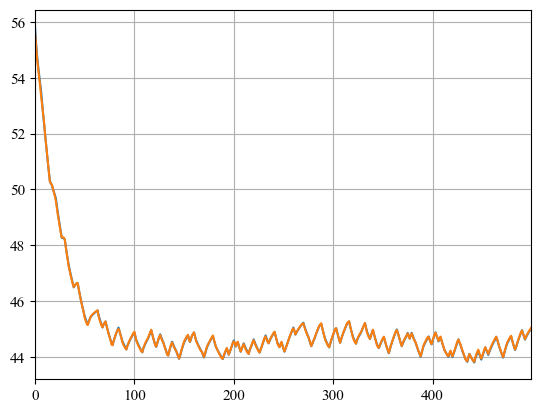

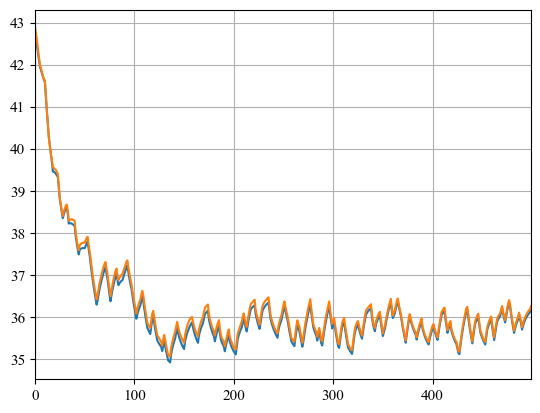

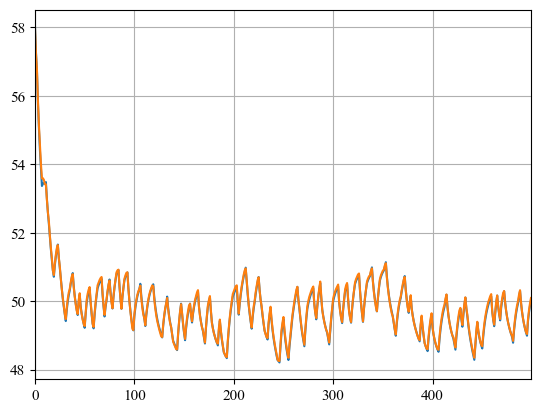

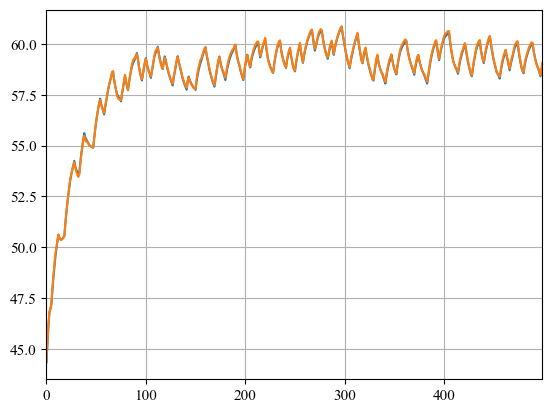

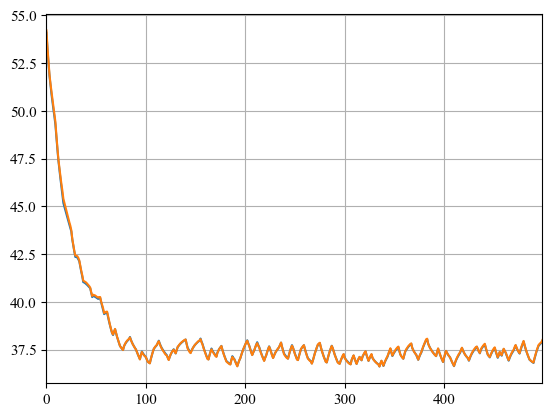

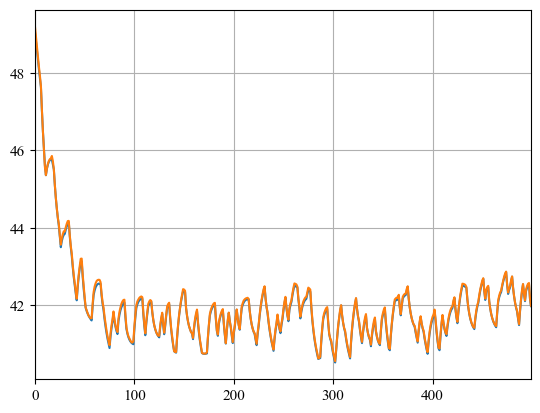

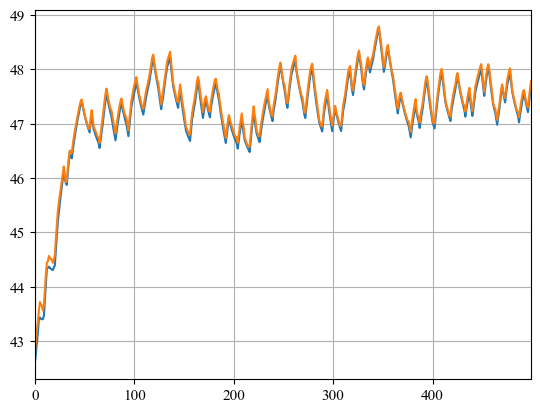

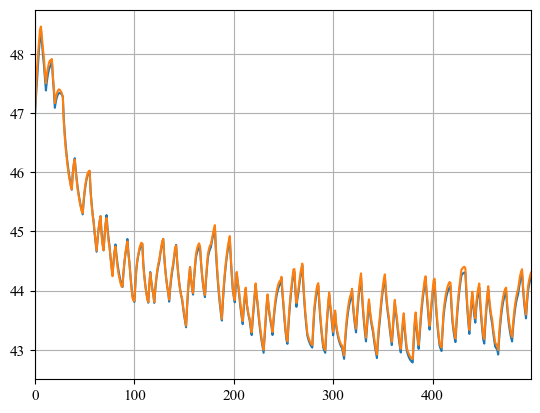

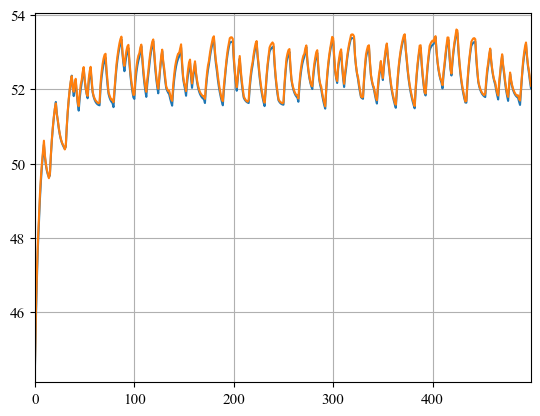

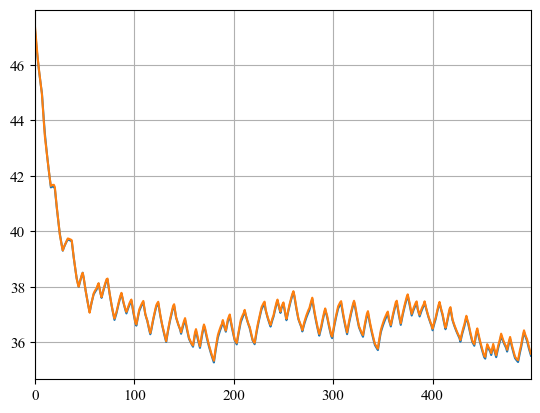

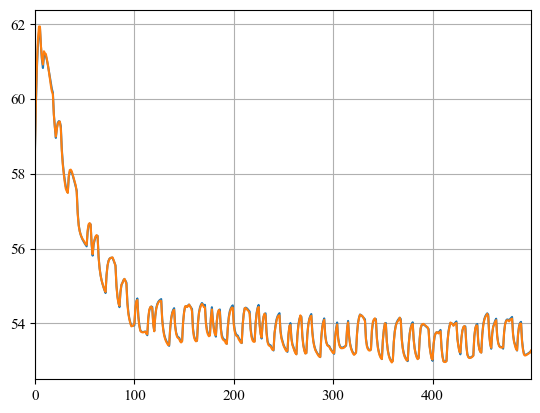

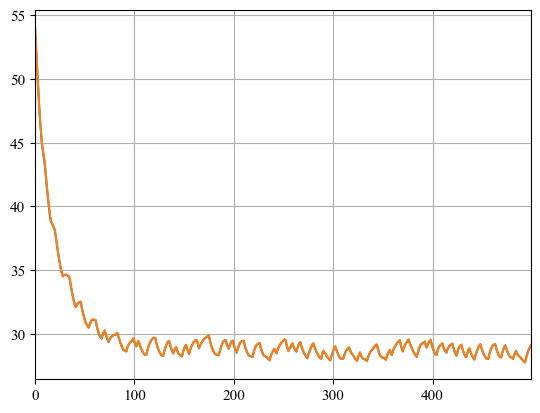

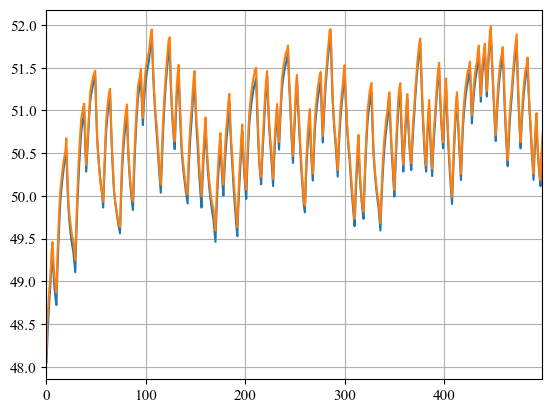

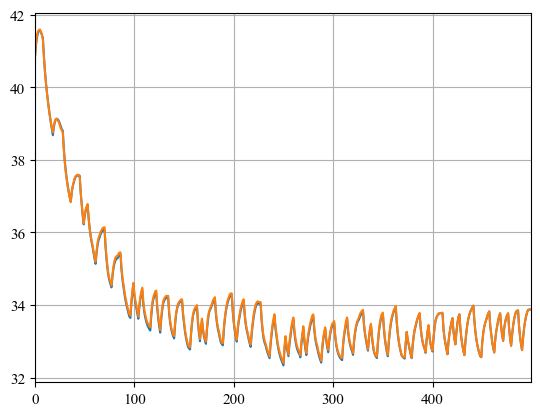

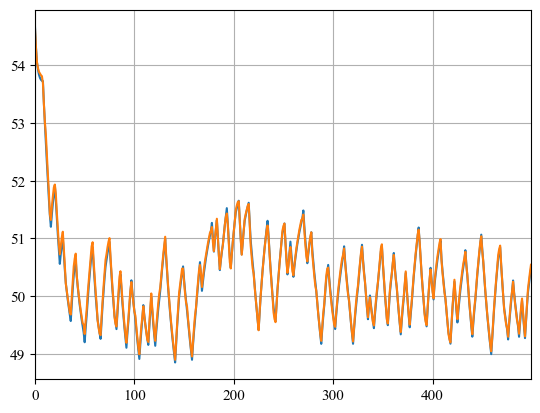

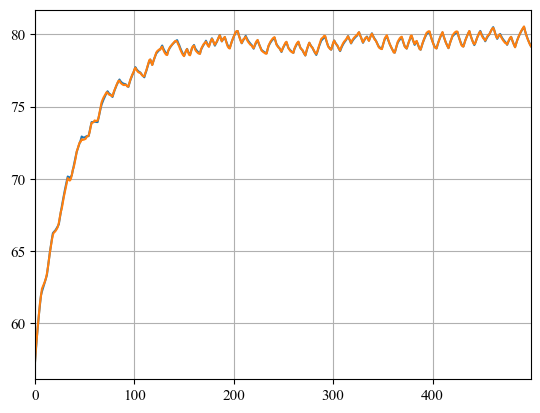

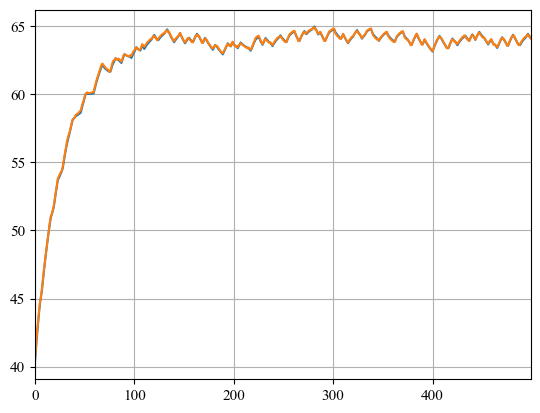

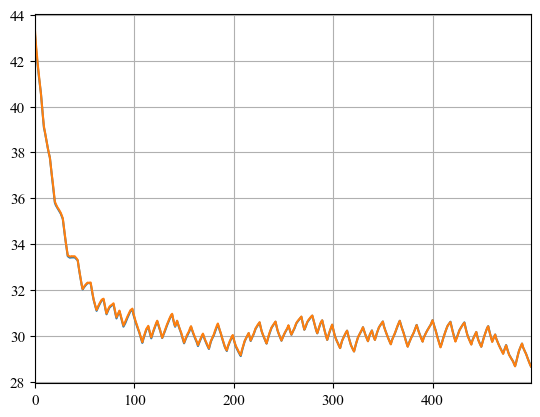

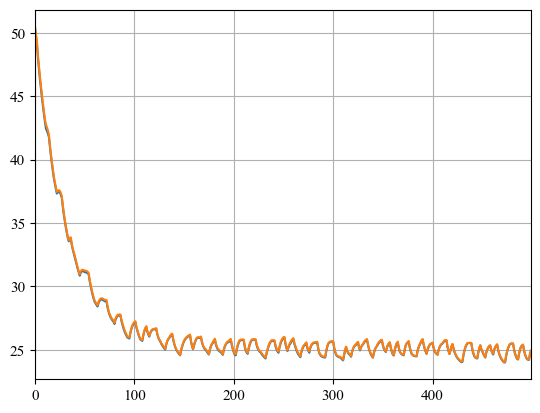

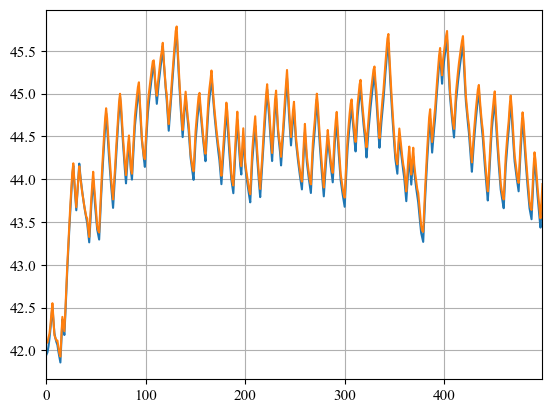

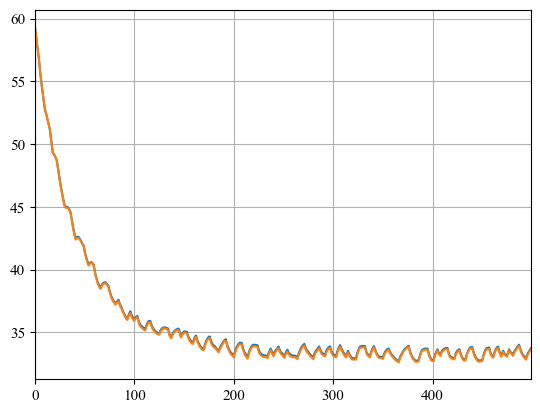

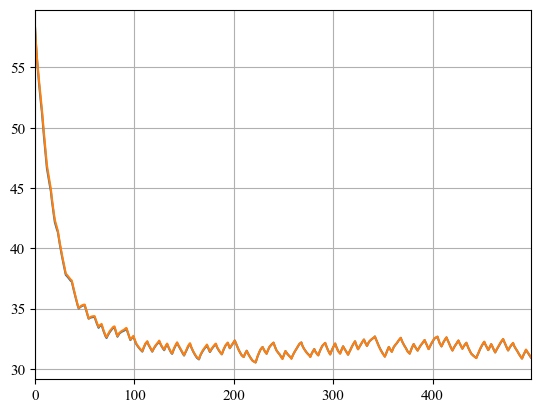

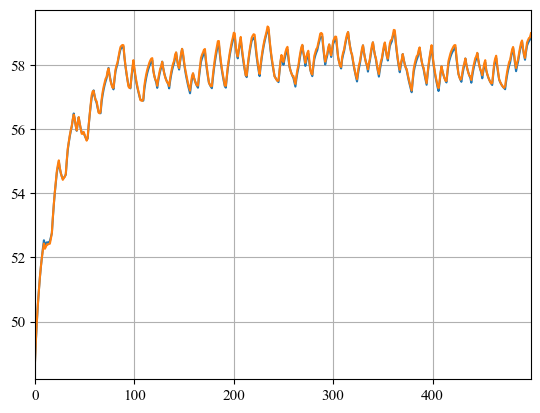

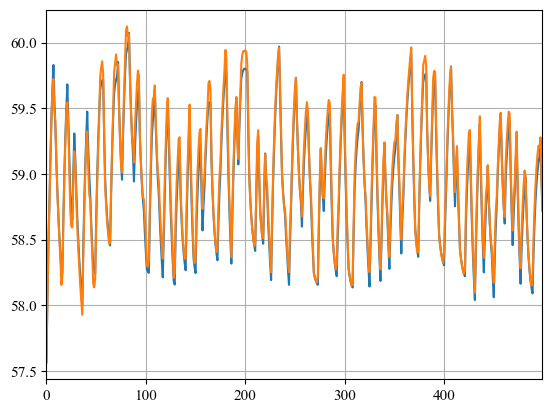

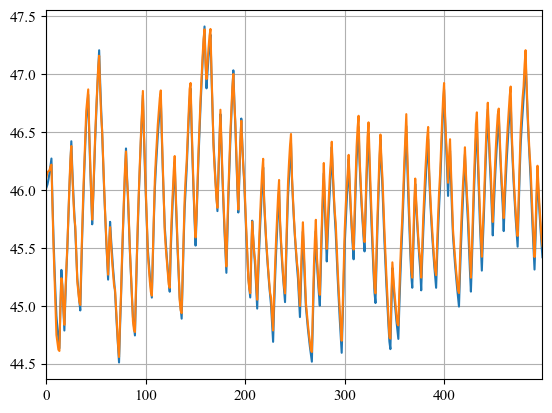

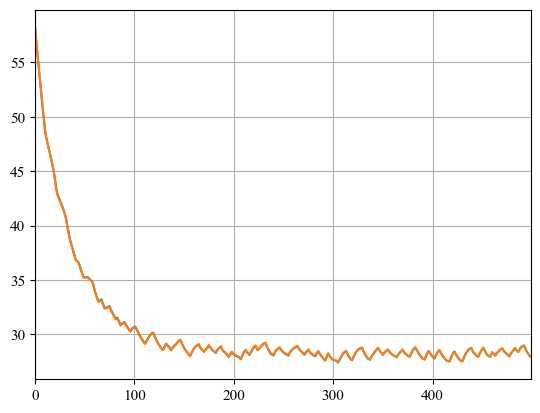

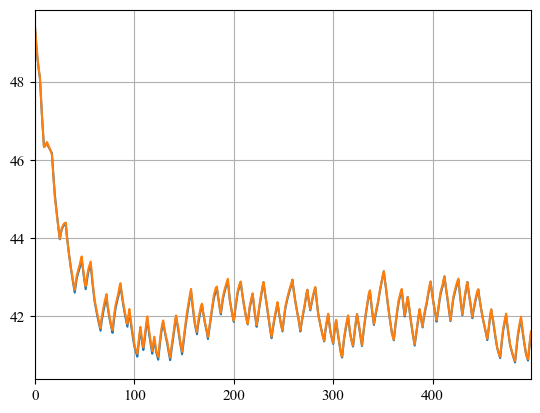

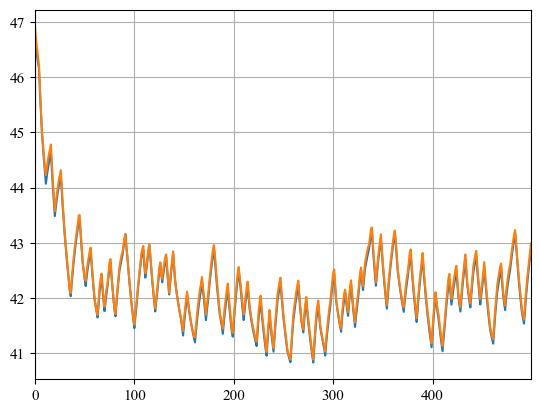

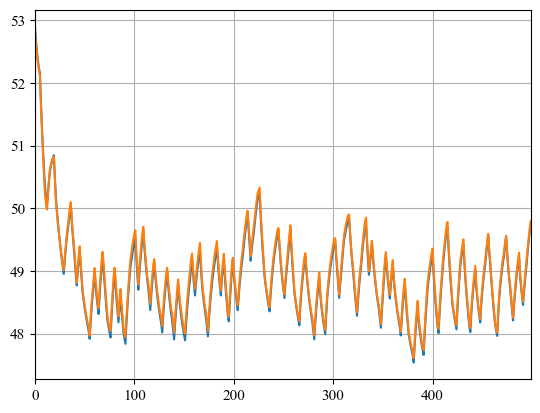

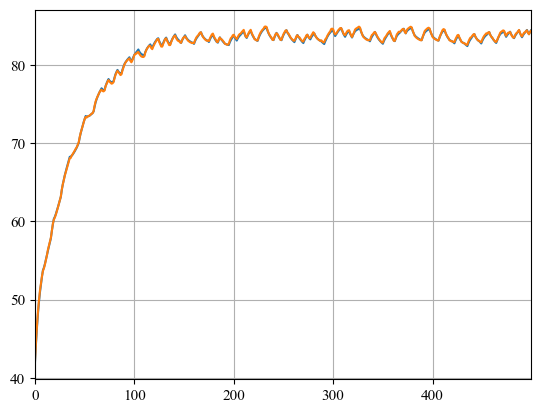

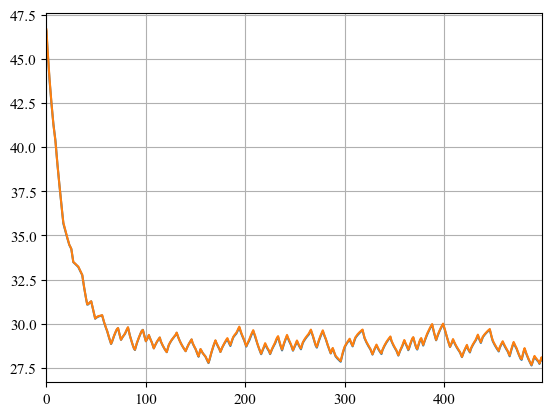

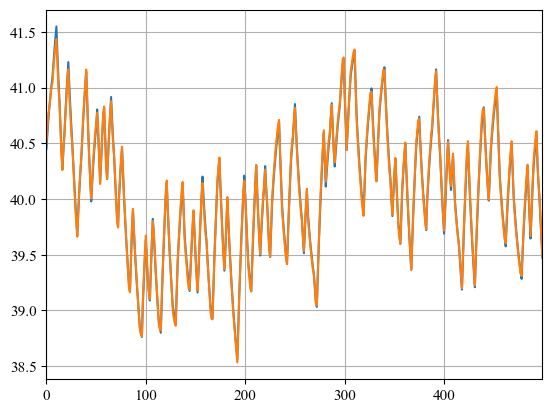

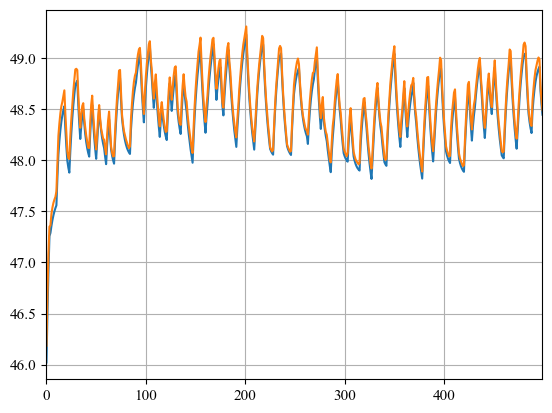

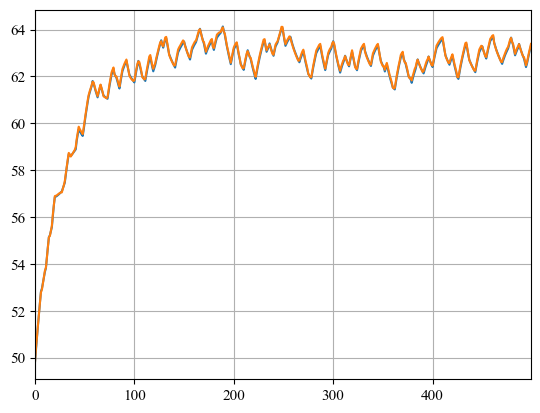

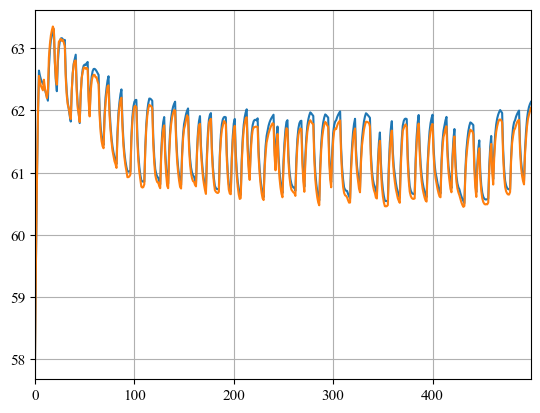

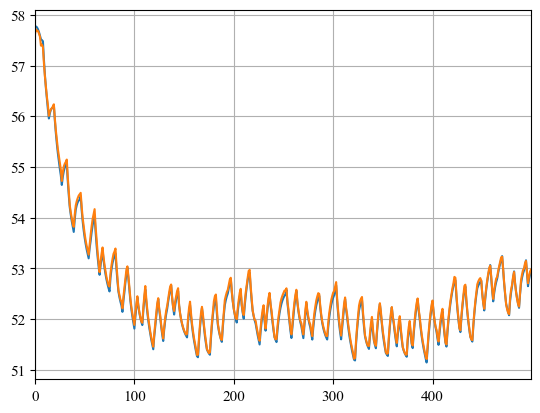

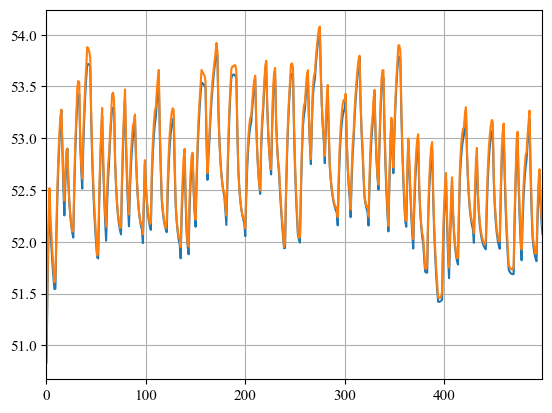

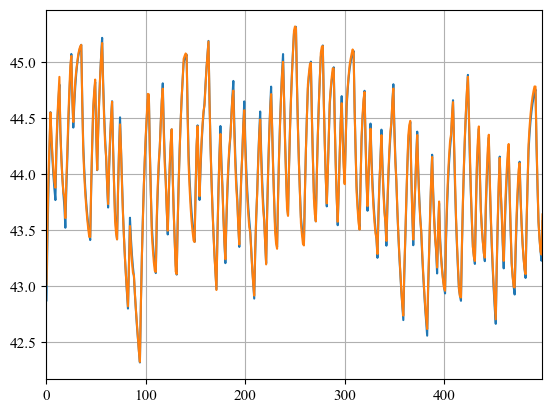

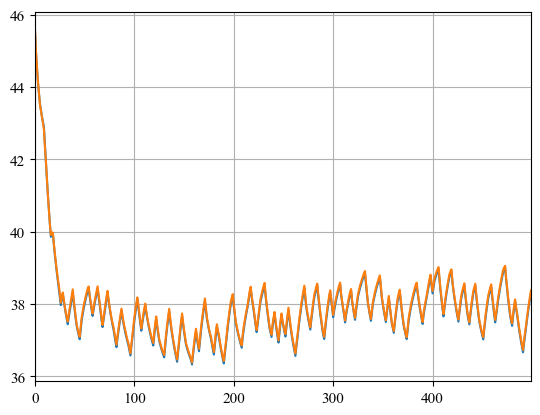

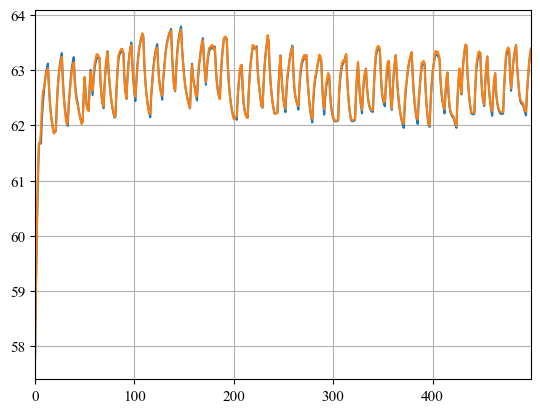

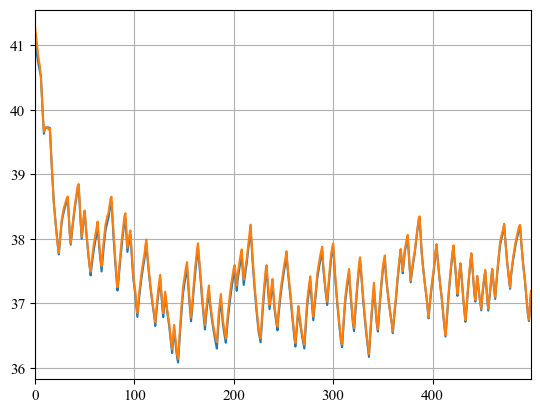

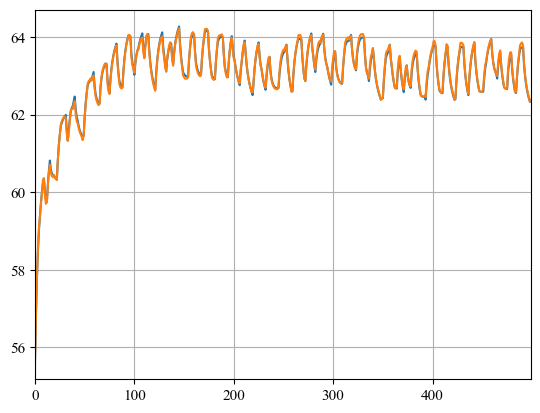

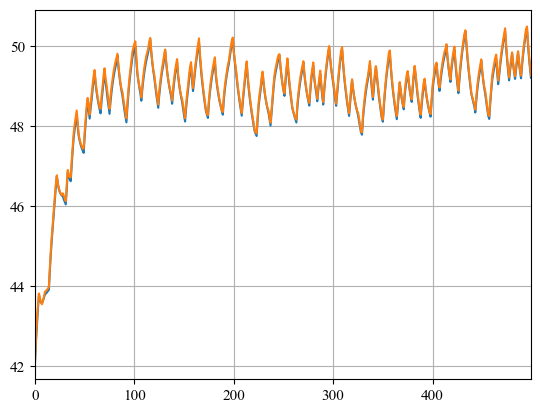

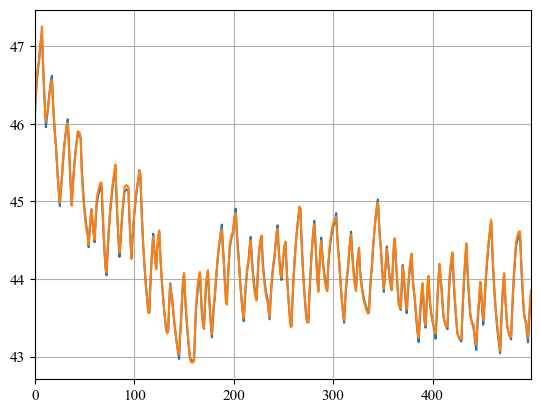

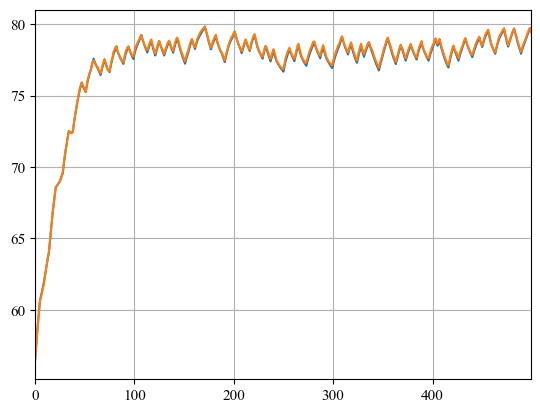

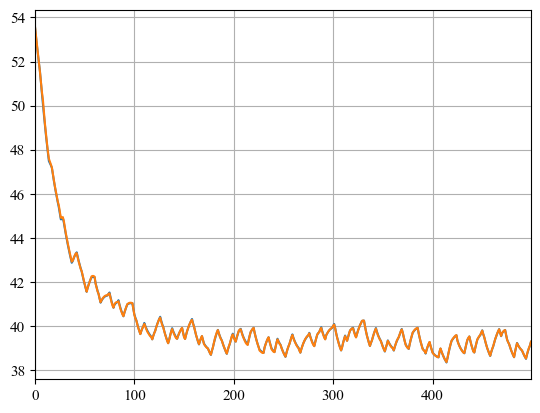

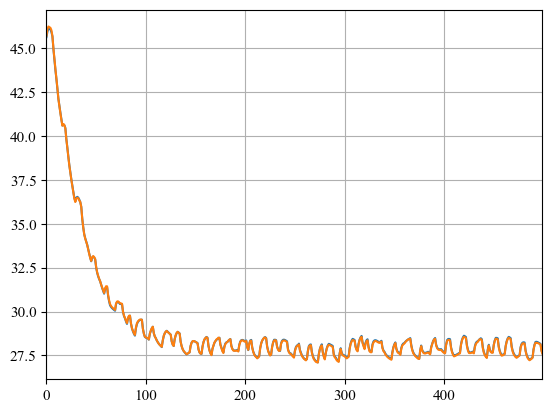

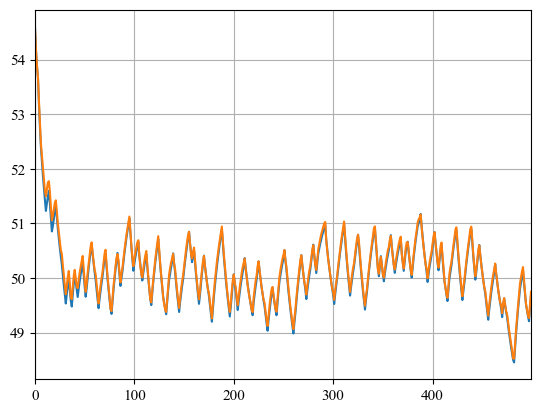

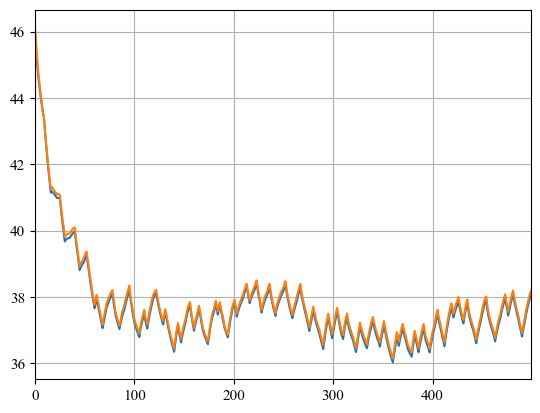

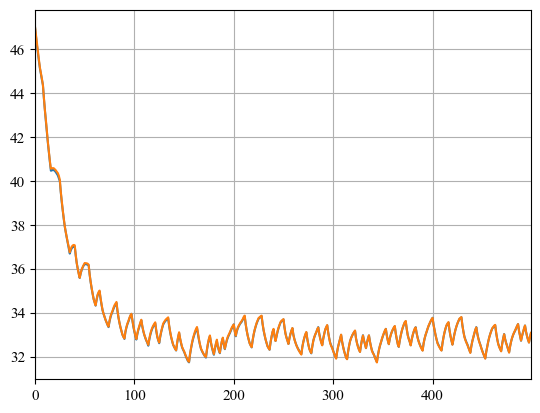

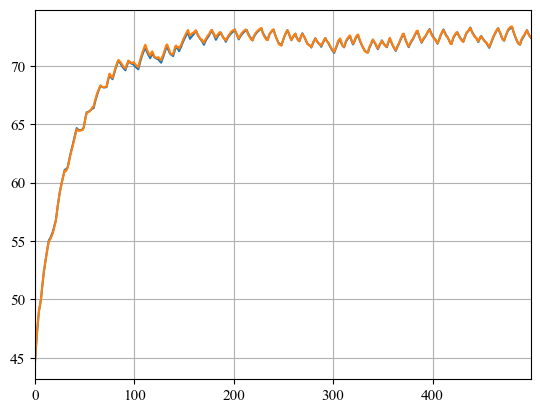

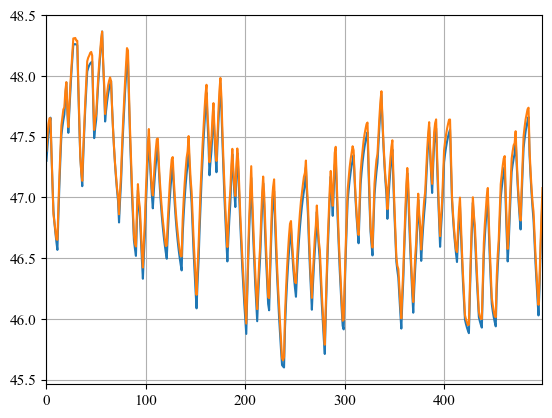

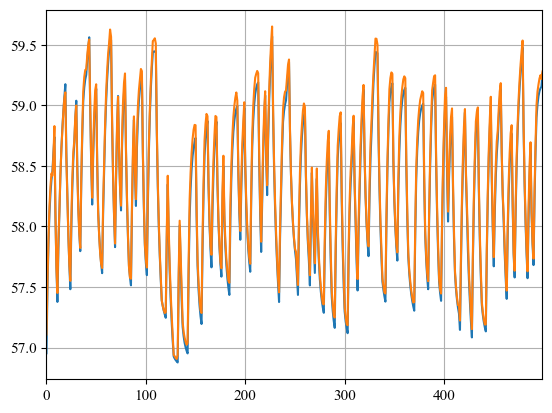

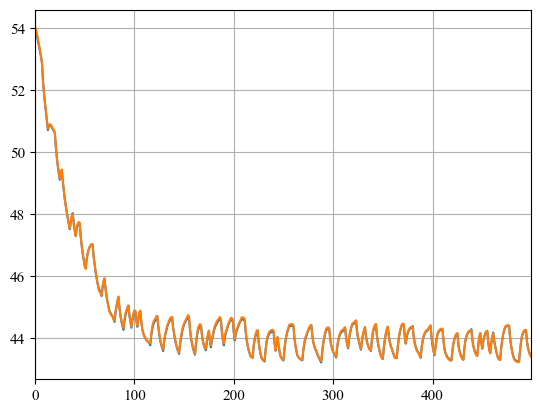

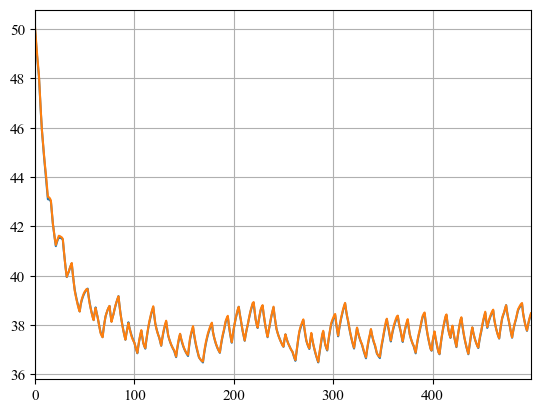

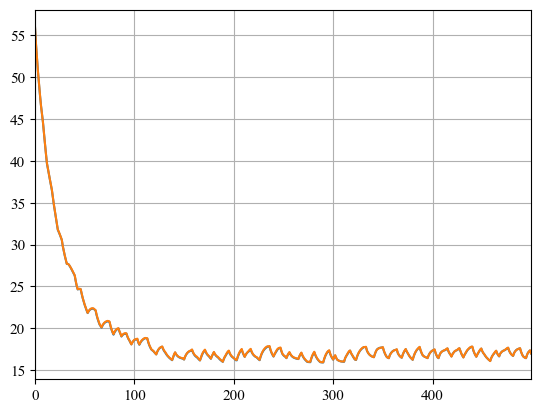

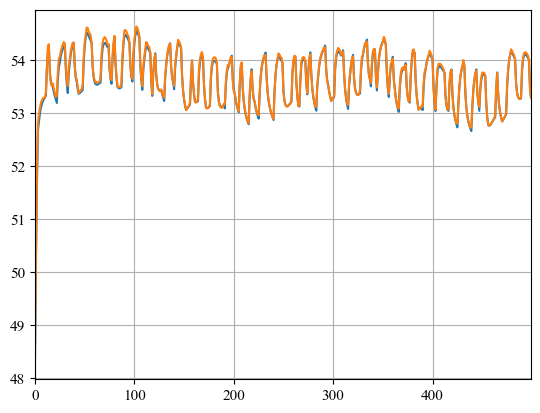

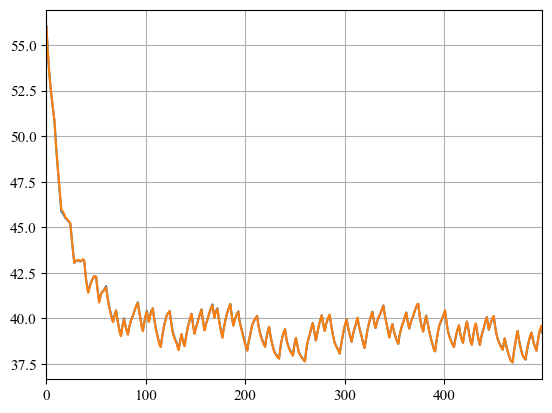

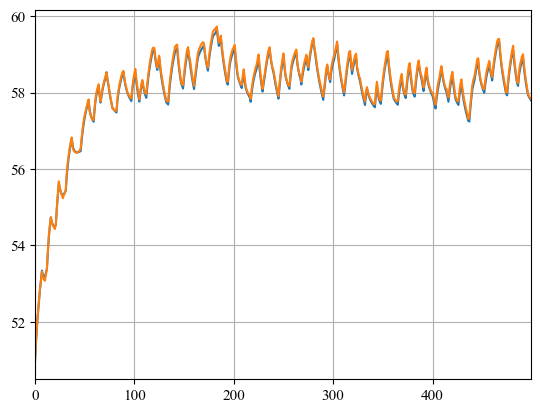

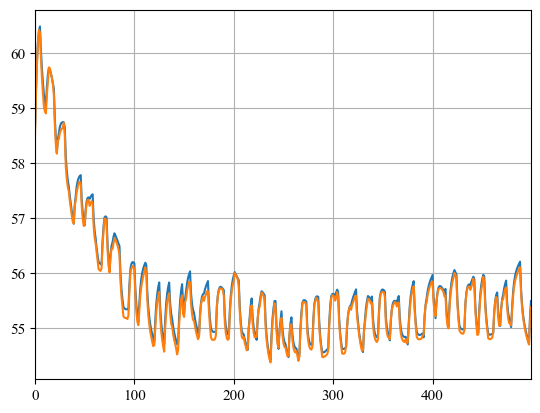

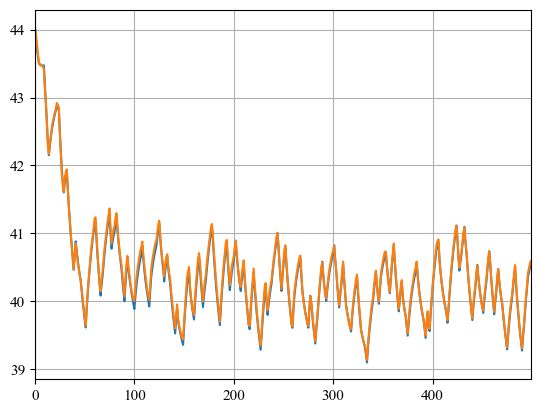

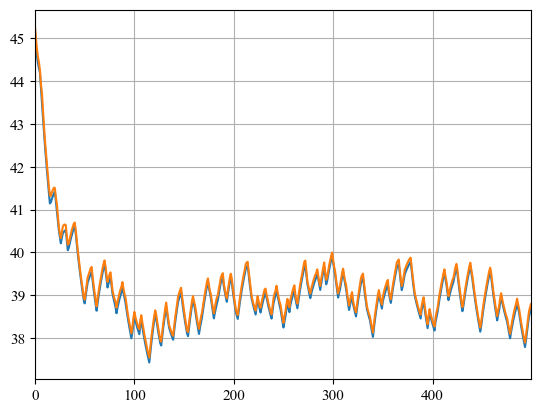

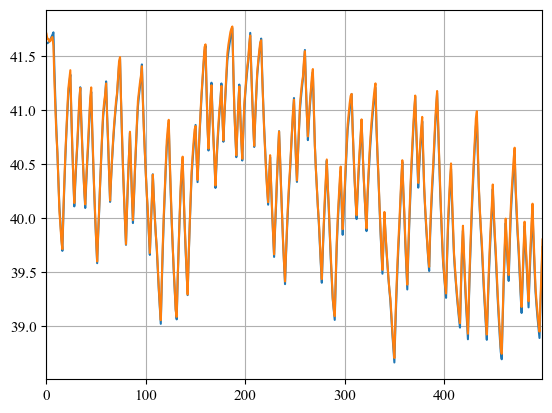

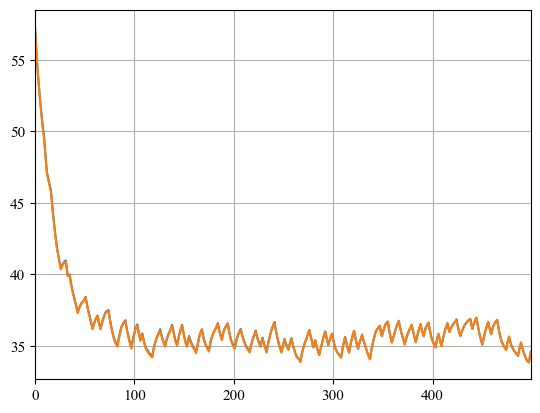

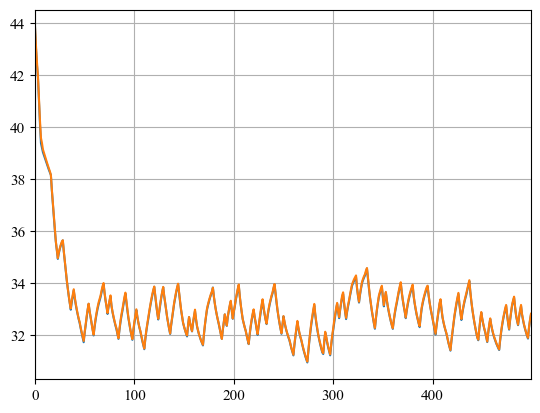

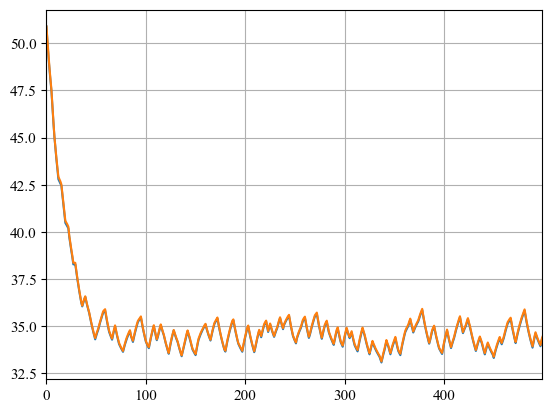

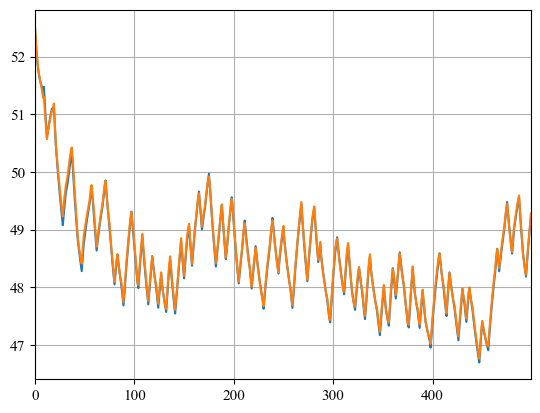

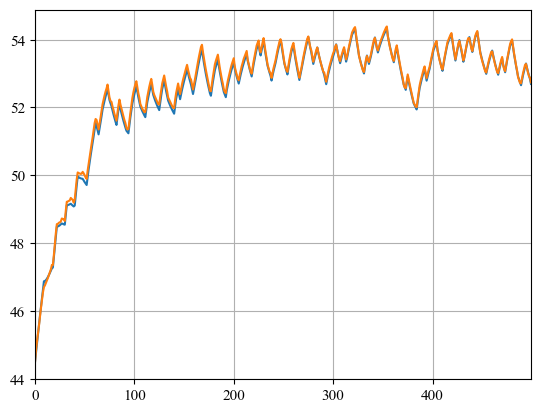

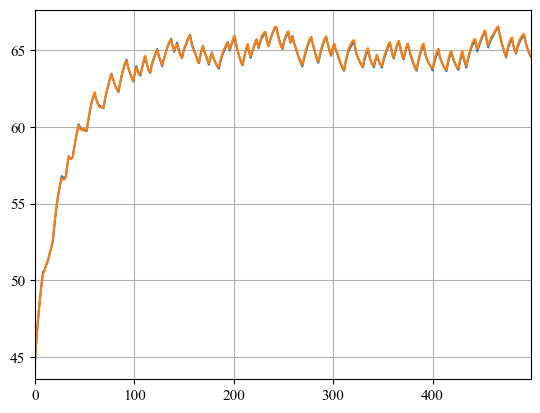

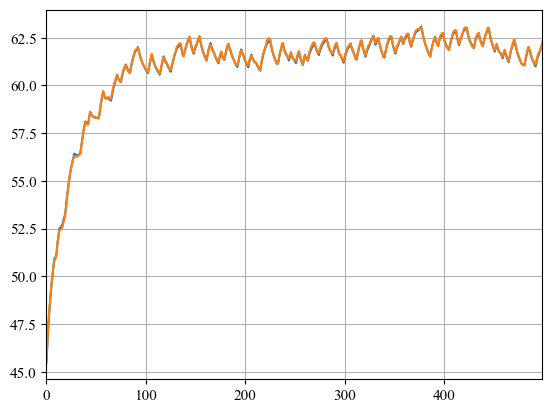

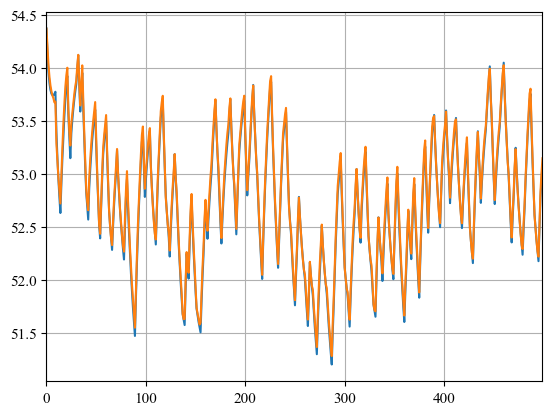

In [52]:
import time
for i in range(len(transformer_data['x1_n'])):
    plt.plot(transformer_data['x2_n'][i,:])
    plt.plot(transformer_data['x2_hat'][i,:])
    plt.show()
    plt.pause(0.5)

In [34]:
t = ekf_data['t']
x1_n_mean = ekf_data['x1_n'].mean(axis=0)
x1_mean = ekf_data['x1'].mean(axis=0)

x1_hat_ekf_mean = ekf_data['x1_hat'].mean(axis=0)
x1_err_ekf_mean = np.abs(ekf_data['x1_n'] - ekf_data['x1_hat']).mean(axis=0)
x1_err_ekf_std = np.abs(ekf_data['x1_n'] - ekf_data['x1_hat']).std(axis=0)

x1_hat_ekf_monco_mean = ekf_monco_data['x1_hat'].mean(axis=0)
x1_err_ekf_monco_mean = np.abs(ekf_monco_data['x1_n'] - ekf_monco_data['x1_hat']).mean(axis=0)
x1_err_ekf_monco_std = np.abs(ekf_monco_data['x1_n'] - ekf_monco_data['x1_hat']).std(axis=0)

x1_hat_trans_mean = transformer_data['x1_hat'].mean(axis=0)
x1_err_trans_mean = np.abs(ekf_data['x1_n'] - transformer_data['x1_hat']).mean(axis=0)
x1_err_trans_std = np.abs(ekf_data['x1_n'] - transformer_data['x1_hat']).std(axis=0)

x1_hat_trans_mean_2 = transformer_data_2['x1_hat'].mean(axis=0)
x1_err_trans_mean_2 = np.abs(ekf_data['x1_n'] - transformer_data_2['x1_hat']).mean(axis=0)
x1_err_trans_std_2 = np.abs(ekf_data['x1_n'] - transformer_data_2['x1_hat']).std(axis=0)


x2_n_mean = ekf_data['x2_n'].mean(axis=0)
x2_mean = ekf_data['x2'].mean(axis=0)

x2_hat_ekf_mean = ekf_data['x2_hat'].mean(axis=0)
x2_err_ekf_mean = np.abs(ekf_data['x2_n'] - ekf_data['x2_hat']).mean(axis=0)
x2_err_ekf_std = np.abs(ekf_data['x2_n'] - ekf_data['x2_hat']).std(axis=0)

x2_hat_ekf_monco_mean = ekf_monco_data['x2_hat'].mean(axis=0)
x2_err_ekf_monco_mean = np.abs(ekf_monco_data['x2_n'] - ekf_monco_data['x2_hat']).mean(axis=0)
x2_err_ekf_monco_std = np.abs(ekf_monco_data['x2_n'] - ekf_monco_data['x2_hat']).std(axis=0)

x2_hat_trans_mean = transformer_data['x2_hat'].mean(axis=0)
x2_err_trans_mean = np.abs(ekf_data['x2_n'] - transformer_data['x2_hat']).mean(axis=0)
x2_err_trans_std = np.abs(ekf_data['x2_n'] - transformer_data['x2_hat']).std(axis=0)

x2_hat_trans_mean_2 = transformer_data_2['x2_hat'].mean(axis=0)
x2_err_trans_mean_2 = np.abs(ekf_data['x2_n'] - transformer_data_2['x2_hat']).mean(axis=0)
x2_err_trans_std_2 = np.abs(ekf_data['x2_n'] - transformer_data_2['x2_hat']).std(axis=0)

y2_mean = ekf_data['y2'].mean(axis=0)

t_ekf = ekf_data['time']
t_ekf_monco = ekf_monco_data['time']
t_trans = transformer_data['time']
t_trans_2 = transformer_data['time']

## Mean error plot with variance

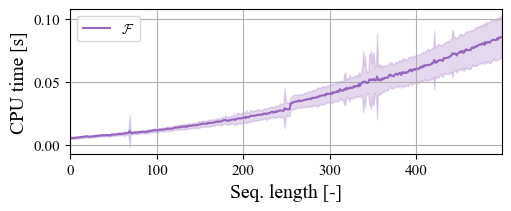

In [35]:
fig = plt.figure(figsize=(5,2), constrained_layout=True)
#plt.plot(t_ekf.mean(axis=0))
#plt.plot(t_ekf_monco.mean(axis=0))
plt.plot(t, t_trans.mean(axis=0), c='tab:purple', label='$\mathcal{F}$')
plt.fill_between(t,
                 t_trans.mean(axis=0) - t_trans.std(axis=0),
                 t_trans.mean(axis=0) + t_trans.std(axis=0),
                 color='tab:purple', alpha=0.25, label='')
plt.xlabel('Seq. length [-]')
plt.ylabel('CPU time [s]')



plt.legend()

plt.savefig('computational_time.pdf')
plt.show()
#plt.ylim([0, 0.01])

### $x_1$

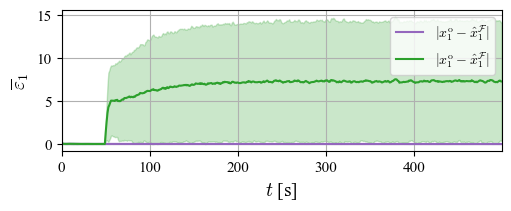

In [37]:
fig = plt.figure(figsize=(5,2), constrained_layout=True)

ax2 = plt.subplot(111)
# plt.plot(t, x1_err_ekf_mean, c='r', label='$|x^{\mathrm{o}}_1 - \hat{x}^{\mathrm{O\!-\!EKF}}_1|$')
# plt.fill_between(t, x1_err_ekf_mean - x1_err_ekf_std, x1_err_ekf_mean + x1_err_ekf_std,
#                  color='r', alpha=0.25, label='')
# plt.plot(t, x1_err_ekf_monco_mean, c='tab:orange', label='$|x^{\mathrm{o}}_1 - \hat{x}^{\mathrm{E\!-\!EKF}}_1|$')
# plt.fill_between(t, x1_err_ekf_monco_mean - x1_err_ekf_monco_std, x1_err_ekf_monco_mean + x1_err_ekf_monco_std,
#                  color='tab:orange', alpha=0.25, label='')
plt.plot(t, x1_err_trans_mean, c='tab:purple', label='$|x^{\mathrm{o}}_1 - \hat{x}^{\mathcal{F}}_1|$')
plt.fill_between(t, x1_err_trans_mean - x1_err_trans_std, x1_err_trans_mean + x1_err_trans_std,
                 color='tab:purple', alpha=0.25, label=None)

plt.plot(t, x1_err_trans_mean_2, c='tab:green', label='$|x^{\mathrm{o}}_1 - \hat{x}^{\mathcal{F}}_1|$')
plt.fill_between(t, x1_err_trans_mean_2 - x1_err_trans_std_2, x1_err_trans_mean_2 + x1_err_trans_std_2,
                 color='tab:green', alpha=0.25, label=None)

plt.xlabel('$t$ [s]')
plt.ylabel(r'$\overline{\varepsilon}_1$')

lines, labels = plt.gca().get_legend_handles_labels()

# lines.insert(1, plt.Line2D([],[], alpha=0))
# labels.insert(1,'')



#plt.legend(lines,labels)
plt.legend()

plt.savefig('results_error_x1_transformer.pdf')
plt.show()

### $x_2$

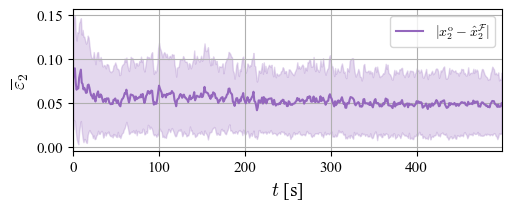

In [6]:
fig = plt.figure(figsize=(5,2), constrained_layout=True)

ax2 = plt.subplot(111)
# plt.plot(t, x2_err_ekf_mean, c='r', label='$|x^{\mathrm{o}}_2 - \hat{x}^{\mathrm{O\!-\!EKF}}_2|$')
# plt.fill_between(t, x2_err_ekf_mean - x2_err_ekf_std, x2_err_ekf_mean + x2_err_ekf_std,
#                  color='r', alpha=0.25, label='')
# plt.plot(t, x2_err_ekf_monco_mean, c='tab:orange', label='$|x^{\mathrm{o}}_2 - \hat{x}^{\mathrm{E\!-\!EKF}}_2|$')
# plt.fill_between(t, x2_err_ekf_monco_mean - x2_err_ekf_monco_std, x2_err_ekf_monco_mean + x2_err_ekf_monco_std,
#                  color='tab:orange', alpha=0.25, label='')
plt.plot(t, x2_err_trans_mean, c='tab:purple', label='$|x^{\mathrm{o}}_2 - \hat{x}^{\mathcal{F}}_2|$')
plt.fill_between(t, x2_err_trans_mean - x2_err_trans_std, x2_err_trans_mean + x2_err_trans_std,
                 color='tab:purple', alpha=0.25, label='')


plt.plot(t, x2_err_trans_mean, c='tab:purple', label='$|x^{\mathrm{o}}_2 - \hat{x}^{\mathcal{F}}_2|$')
plt.fill_between(t, x2_err_trans_mean - x2_err_trans_std, x2_err_trans_mean + x2_err_trans_std,
                 color='tab:purple', alpha=0.25, label='')

plt.xlabel('$t$ [s]')
plt.ylabel(r'$\overline{\varepsilon}_2$')

# lines, labels = plt.gca().get_legend_handles_labels()
# 
# lines.insert(1, plt.Line2D([],[], alpha=0))
# labels.insert(1,'')



# plt.legend(lines,labels,ncol=1)
plt.legend()

#plt.savefig('results_error_x2_transformer.pdf')
plt.show()

In [13]:
t_trans.std()

0.004172831583118105

In [18]:
x1_err_trans_std.mean()

0.02435590669797517

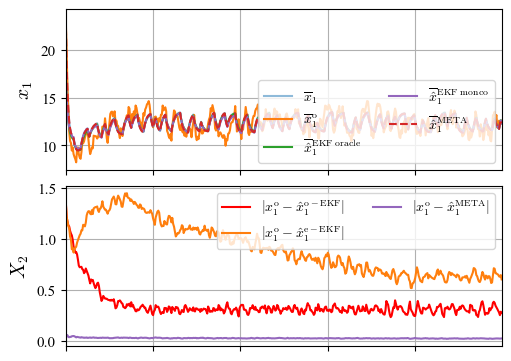

In [11]:
fig = plt.figure(figsize=(5,3.5), constrained_layout=True)

n1, n2, n3 = np.random.choice(np.arange(0,100), 3)

ax1 = plt.subplot(211)
plt.plot(t, ekf_data['x1_n'][n1,:], c='tab:blue', label='$\overline{x}_1$', alpha=0.5)
plt.plot(t, ekf_data['x1'][n1,:], c='tab:orange', label='$\overline{x}^{\mathrm{o}}_1$')
plt.plot(t, ekf_data['x1_hat'][n1,:], c='tab:green', label='$\overline{\hat{x}}^{\mathrm{EKF\ oracle}}_1$', linestyle='-')
plt.plot(t, ekf_monco_data['x1_hat'][n1,:], c='tab:purple', label='$\overline{\hat{x}}^{\mathrm{EKF\ monco}}_1$', linestyle='-')
plt.plot(t, transformer_data['x1_hat'][n1,:], c='tab:red', label='$\overline{\hat{x}}^{\mathrm{META}}_1$', linestyle='--')
plt.tick_params('x', labelbottom=False)
plt.ylabel('$x_1$')
plt.legend(loc="lower right", ncol=2)

ax2 = plt.subplot(212, sharex=ax1)
plt.plot(x1_err_ekf_mean, c='r', label='$|x^{\mathrm{o}}_1 - \hat{x}^{\mathrm{o-EKF}}_1|$')
plt.plot(x1_err_ekf_monco_mean, c='tab:orange', label='$|x^{\mathrm{o}}_1 - \hat{x}^{\mathrm{e-EKF}}_1|$')
plt.plot(x1_err_trans_mean, c='tab:purple', label='$|x^{\mathrm{o}}_1 - \hat{x}^{\mathrm{META}}_1|$')
#plt.xlabel('$t$ [s]')
plt.tick_params('x', labelbottom=False)
plt.ylabel('$X_2$')
plt.legend(ncol=2)

# ax2 = plt.subplot(313, sharex=ax1)
# plt.plot(x1_err_ekf_mean, c='tab:green', label='$|\hat{x}^{\mathrm{EKF\ oracle}}_1 - x^{\mathrm{o}}_1|$')
# #plt.plot(np.abs(ekf_data['x1_n'] - ekf_data['x1_hat']).T, c='tab:green', alpha=0.05, label='')
# plt.plot(x1_err_trans_mean, c='tab:red', label='$|\hat{x}^{\mathrm{META}}_1 - x^{\mathrm{o}}_1|$')
# plt.plot(x1_err_ekf_monco_mean, c='tab:purple', label='$|\hat{x}^{\mathrm{EKF\ monco}}_1 - x^{\mathrm{o}}_1|$')
# #plt.plot(np.abs(ekf_data['x1_n'] - transformer_data['x1_hat']).T, c='tab:red', alpha=0.05, label='')
# plt.xlabel('$t$ [s]')
# plt.ylabel(r'$\varepsilon_1$')
# #plt.ylim([0, 1])
# plt.legend(ncol=2)

# ax3 = plt.subplot(222)
# plt.plot(t, y2_mean, color='tab:purple', label='$\overline{y}$')
# plt.plot(t, x2_mean, label='$\overline{x}_2$')
# plt.plot(t, x2_n_mean, label='$\overline{x}^{\mathrm{o}}_2$')
# plt.plot(t, x2_hat_ekf_mean, label='$\overline{\hat{x}}^{\mathrm{EKF}}_2$')
# plt.plot(t, x2_hat_trans_mean, label='$\overline{\hat{x}}^{\mathrm{META}}_2$')
# plt.tick_params('x', labelbottom=False)
# plt.ylabel('$P_2$')
# plt.legend(loc="upper right")
# 
# ax4 = plt.subplot(224, sharex=ax1)
# plt.plot(x2_err_ekf_mean, c='r', label='$|x^{\mathrm{o}}_2 - \hat{x}^{\mathrm{EKF}}_2|$')
# plt.plot(x2_err_trans_mean, c='tab:orange', label='$|x^{\mathrm{o}}_2 - \hat{x}^{\mathrm{META}}_2|$')
# plt.xlabel('$t$ [s]')
# plt.ylabel('$P_2$')
# plt.legend()

# plt.tight_layout(h_pad=0.2)
plt.savefig('results_monco.pdf')
plt.show()

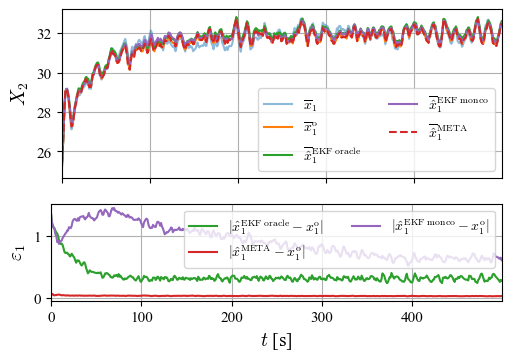

In [4]:
fig = plt.figure(figsize=(5,3.5), constrained_layout=True)

ax1 = plt.subplot(211)
plt.plot(t, x1_mean, c='tab:blue', label='$\overline{x}_1$', alpha=0.5)
plt.plot(t, x1_n_mean, c='tab:orange', label='$\overline{x}^{\mathrm{o}}_1$')
plt.plot(t, x1_hat_ekf_mean, c='tab:green', label='$\overline{\hat{x}}^{\mathrm{EKF\ oracle}}_1$', linestyle='-')
plt.plot(t, x1_hat_ekf_monco_mean, c='tab:purple', label='$\overline{\hat{x}}^{\mathrm{EKF\ monco}}_1$', linestyle='-')
plt.plot(t, x1_hat_trans_mean, c='tab:red', label='$\overline{\hat{x}}^{\mathrm{META}}_1$', linestyle='--')
plt.tick_params('x', labelbottom=False)
plt.ylabel('$X_2$')
plt.legend(loc="lower right", ncol=2)

# ax2 = plt.subplot(413, sharex=ax1)
# plt.plot(x1_err_ekf_mean, c='r', label='$|x^{\mathrm{o}}_1 - \hat{x}^{\mathrm{EKF}}_1|$')
# plt.plot(x1_err_trans_mean, c='tab:orange', label='$|x^{\mathrm{o}}_1 - \hat{x}^{\mathrm{META}}_1|$')
# #plt.xlabel('$t$ [s]')
# plt.tick_params('x', labelbottom=False)
# plt.ylabel('$X_2$')
# plt.legend(ncol=2)

ax2 = plt.subplot(313, sharex=ax1)
plt.plot(x1_err_ekf_mean, c='tab:green', label='$|\hat{x}^{\mathrm{EKF\ oracle}}_1 - x^{\mathrm{o}}_1|$')
#plt.plot(np.abs(ekf_data['x1_n'] - ekf_data['x1_hat']).T, c='tab:green', alpha=0.05, label='')
plt.plot(x1_err_trans_mean, c='tab:red', label='$|\hat{x}^{\mathrm{META}}_1 - x^{\mathrm{o}}_1|$')
plt.plot(x1_err_ekf_monco_mean, c='tab:purple', label='$|\hat{x}^{\mathrm{EKF\ monco}}_1 - x^{\mathrm{o}}_1|$')
#plt.plot(np.abs(ekf_data['x1_n'] - transformer_data['x1_hat']).T, c='tab:red', alpha=0.05, label='')
plt.xlabel('$t$ [s]')
plt.ylabel(r'$\varepsilon_1$')
#plt.ylim([0, 1])
plt.legend(ncol=2)

# ax3 = plt.subplot(222)
# plt.plot(t, y2_mean, color='tab:purple', label='$\overline{y}$')
# plt.plot(t, x2_mean, label='$\overline{x}_2$')
# plt.plot(t, x2_n_mean, label='$\overline{x}^{\mathrm{o}}_2$')
# plt.plot(t, x2_hat_ekf_mean, label='$\overline{\hat{x}}^{\mathrm{EKF}}_2$')
# plt.plot(t, x2_hat_trans_mean, label='$\overline{\hat{x}}^{\mathrm{META}}_2$')
# plt.tick_params('x', labelbottom=False)
# plt.ylabel('$P_2$')
# plt.legend(loc="upper right")
# 
# ax4 = plt.subplot(224, sharex=ax1)
# plt.plot(x2_err_ekf_mean, c='r', label='$|x^{\mathrm{o}}_2 - \hat{x}^{\mathrm{EKF}}_2|$')
# plt.plot(x2_err_trans_mean, c='tab:orange', label='$|x^{\mathrm{o}}_2 - \hat{x}^{\mathrm{META}}_2|$')
# plt.xlabel('$t$ [s]')
# plt.ylabel('$P_2$')
# plt.legend()

# plt.tight_layout(h_pad=0.2)
plt.savefig('results_monco.pdf')
plt.show()

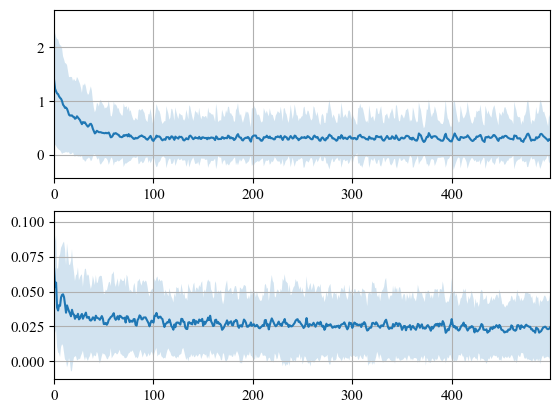

In [8]:
plt.subplot(211)
plt.plot(t, x1_err_ekf_mean)
plt.fill_between(t, x1_err_ekf_mean - x1_err_ekf_std, x1_err_ekf_mean + x1_err_ekf_std, alpha=0.2)
plt.subplot(212)
plt.plot(t, x1_err_trans_mean)
plt.fill_between(t, x1_err_trans_mean - x1_err_trans_std, x1_err_trans_mean + x1_err_trans_std, alpha=0.2)

In [11]:
x1_err_ekf_mean.mean()

0.3522703561203548

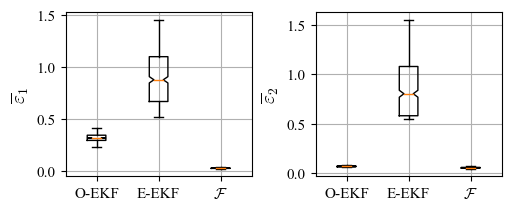

In [56]:
fig = plt.figure(figsize=(5,2), constrained_layout=True)

plt.subplot(121)
plt.boxplot([x1_err_ekf_mean, x1_err_ekf_monco_mean, x1_err_trans_mean], notch=True, sym="", labels=["O-EKF","E-EKF","$\mathcal{F}$"])
plt.ylabel(r'$\overline{\varepsilon}_1$')

plt.subplot(122)
plt.boxplot([x2_err_ekf_mean, x2_err_ekf_monco_mean, x2_err_trans_mean], notch=True, sym="", labels=["O-EKF","E-EKF","$\mathcal{F}$"])
plt.ylabel(r'$\overline{\varepsilon}_2$')
plt.savefig('boxplot.pdf')
plt.show()

In [64]:
x1_err_trans_mean.mean()

0.027156877556304564

In [70]:
x2_err_trans_mean.mean()/x2_err_ekf_monco_mean.mean()

0.05999415797267778

In [10]:
print(x1_n_mean[0])
print(x1_hat_ekf_mean[0])
print(x1_hat_trans_mean[0])
print(x1_err_ekf_mean[0])
print(x1_err_ekf_mean[0])

25.267845182874773
25.052991163424494
25.332216
1.380175973064779
1.380175973064779


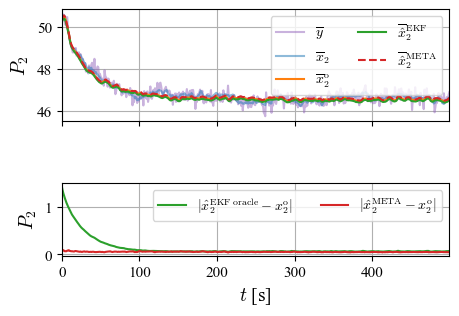

In [48]:
fig = plt.figure(figsize=(5,3.5), constrained_layout=True)

# ax1 = plt.subplot(211)
# plt.plot(t, x1_mean, c='tab:blue', label='$\overline{x}_1$', alpha=0.5)
# plt.plot(t, x1_n_mean, c='tab:orange', label='$\overline{x}^{\mathrm{o}}_1$')
# plt.plot(t, x1_hat_ekf_mean, c='tab:green', label='$\overline{\hat{x}}^{\mathrm{EKF\ oracle}}_1$', linestyle='-')
# plt.plot(t, x1_hat_trans_mean, c='tab:red', label='$\overline{\hat{x}}^{\mathrm{META}}_1$', linestyle='--')
# plt.tick_params('x', labelbottom=False)
# plt.ylabel('$X_2$')
# plt.legend(loc="lower right", ncol=2)

# ax2 = plt.subplot(413, sharex=ax1)
# plt.plot(x1_err_ekf_mean, c='r', label='$|x^{\mathrm{o}}_1 - \hat{x}^{\mathrm{EKF}}_1|$')
# plt.plot(x1_err_trans_mean, c='tab:orange', label='$|x^{\mathrm{o}}_1 - \hat{x}^{\mathrm{META}}_1|$')
# #plt.xlabel('$t$ [s]')
# plt.tick_params('x', labelbottom=False)
# plt.ylabel('$X_2$')
# plt.legend(ncol=2)

# ax2 = plt.subplot(313, sharex=ax1)
# plt.plot(x1_err_ekf_mean, c='tab:green', label='$|\hat{x}^{\mathrm{EKF\ oracle}}_1 - x^{\mathrm{o}}_1|$')
# plt.plot(x1_err_trans_mean, c='tab:red', label='$|\hat{x}^{\mathrm{META}}_1 - x^{\mathrm{o}}_1|$')
# plt.xlabel('$t$ [s]')
# plt.ylabel(r'$\varepsilon_1$')
# plt.legend(ncol=2)

ax1 = plt.subplot(211)
plt.plot(t, y2_mean, color='tab:purple', label='$\overline{y}$', alpha=0.5)
plt.plot(t, x2_mean, c='tab:blue', label='$\overline{x}_2$', alpha=0.5)
plt.plot(t, x2_n_mean, c='tab:orange', label='$\overline{x}^{\mathrm{o}}_2$')
plt.plot(t, x2_hat_ekf_mean, c='tab:green', label='$\overline{\hat{x}}^{\mathrm{EKF}}_2$')
plt.plot(t, x2_hat_trans_mean, c='tab:red', label='$\overline{\hat{x}}^{\mathrm{META}}_2$', linestyle='--')
plt.tick_params('x', labelbottom=False)
plt.ylabel('$P_2$')
plt.legend(loc="upper right", ncol=2)
# 
ax2 = plt.subplot(313, sharex=ax1)
plt.plot(x2_err_ekf_mean, c='tab:green', label='$|\hat{x}^{\mathrm{EKF\ oracle}}_2 - x^{\mathrm{o}}_2|$')
plt.plot(x2_err_trans_mean, c='tab:red', label='$|\hat{x}^{\mathrm{META}}_2 - x^{\mathrm{o}}_2|$')
plt.xlabel('$t$ [s]')
plt.ylabel('$P_2$')
plt.legend(ncol=2)

#plt.tight_layout(h_pad=0.2)
plt.savefig('results_5.pdf')
plt.show()

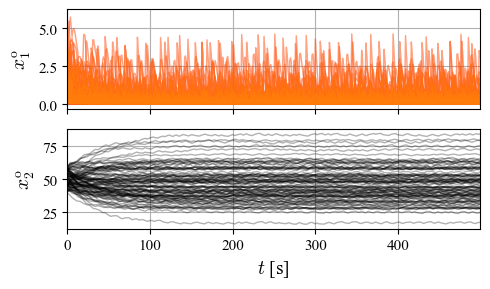

In [11]:
plt.figure(figsize=(5,3))

ax1 = plt.subplot(211)
plt.plot(np.abs(ekf_data['x1_n'].T - ekf_data['x1_hat'].T), c='r', alpha=0.3, linewidth=1)
plt.plot(np.abs(transformer_data['x1_n'].T - ekf_data['x1_hat'].T), c='tab:orange', alpha=0.3, linewidth=1)
#plt.plot(, c='k', alpha=0.3, linewidth=1)
plt.tick_params('x', labelbottom=False)
plt.ylabel('$x^{\mathrm{o}}_1$')

ax2 = plt.subplot(212, sharex=ax1)
plt.plot(ekf_data['x2_n'].T, c='k', alpha=0.3, linewidth=1)
plt.ylabel('$x^{\mathrm{o}}_2$')
plt.xlabel('$t$ [s]')

plt.tight_layout()

plt.show()